In [1]:
# Load the dataset 

import pandas as pd
movies = pd.read_csv('/content/drive/MyDrive/NLP dataset /IMDB Dataset/IMDB Dataset.csv') 
movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


- The IMDB movies reviews had 2 columns, one for the review text, and the other for the sentiment

In [2]:
## shape 
movies.shape

(50000, 2)

In [3]:
#value count 
movies['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

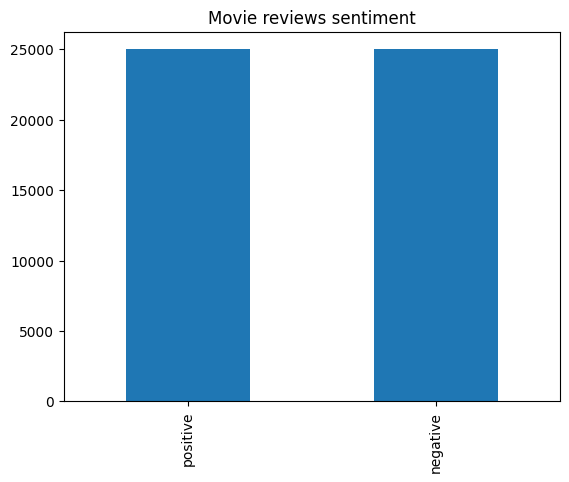

In [5]:

# import matplotlib
import matplotlib.pyplot as plt
movies['sentiment'].value_counts().plot.bar()
plt.title('Movie reviews sentiment') 
plt.savefig('Imdb_reviews_class')
plt.show()

The dataset is balanced

**Text Preprocessing**

In [6]:
# import necessary preprocessing libraries 
from gensim.utils import simple_preprocess 
from gensim.parsing.preprocessing import remove_stopwords

In [7]:
# remove stop words 
word_pre = movies['review'].apply(remove_stopwords) 
word_pre.head()

0    One reviewers mentioned watching 1 Oz episode ...
1    A wonderful little production. <br /><br />The...
2    I thought wonderful way spend time hot summer ...
3    Basically there's family little boy (Jake) thi...
4    Petter Mattei's "Love Time Money" visually stu...
Name: review, dtype: object

In [8]:
# apply simple_preprocess 
cleaned = word_pre.apply(simple_preprocess) 
cleaned.head()

0    [one, reviewers, mentioned, watching, oz, epis...
1    [wonderful, little, production, br, br, the, f...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, there, family, little, boy, jake, ...
4    [petter, mattei, love, time, money, visually, ...
Name: review, dtype: object

In [9]:
cleaned[1]

['wonderful',
 'little',
 'production',
 'br',
 'br',
 'the',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'gives',
 'comforting',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'br',
 'br',
 'the',
 'actors',
 'extremely',
 'chosen',
 'michael',
 'sheen',
 'has',
 'got',
 'polari',
 'voices',
 'pat',
 'too',
 'you',
 'truly',
 'seamless',
 'editing',
 'guided',
 'references',
 'williams',
 'diary',
 'entries',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'great',
 'master',
 'comedy',
 'life',
 'br',
 'br',
 'the',
 'realism',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'which',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'it',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'orton',
 'halliwell',
 'sets',
 'particularly',
 'flat',
 'halliwell',
 'murals',
 'decorating',
 'surface',
 't

In [10]:
movies['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [11]:
# add cleaned reviews to the data frame 
movies['cleaned_review'] = cleaned 
movies.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, br, br, the, f..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,"[basically, there, family, little, boy, jake, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visually, ..."


In [12]:
# length of each review

movies['Len_word'] = [len(movies['review'][i]) for i in range(len(movies['review']))] 
movies['cleaned_Len_word'] = [len(movies['cleaned_review'][i]) for i in range(len(movies['cleaned_review']))] 
 
movies.head()

,review,sentiment,cleaned_review,Len_word,cleaned_Len_word
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, oz, epis...",1761,175
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, br, br, the, f...",998,91
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...",926,83
3,Basically there's a family where a little boy ...,negative,"[basically, there, family, little, boy, jake, ...",748,73
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visually, ...",1317,123


- There is a huge difference between the number of words in the text before and after the preprocessing techniques.

In [16]:
# cleaned reviews with the maximum number of words 
import numpy as np
np.max(movies['cleaned_Len_word'])

1419

* A cleaned review has 1419 words, which is the highest in the documents

### GENERATE WORDCLOUDS FROM THE REVIEWS

In [ ]:
# import the necessary libraries  
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


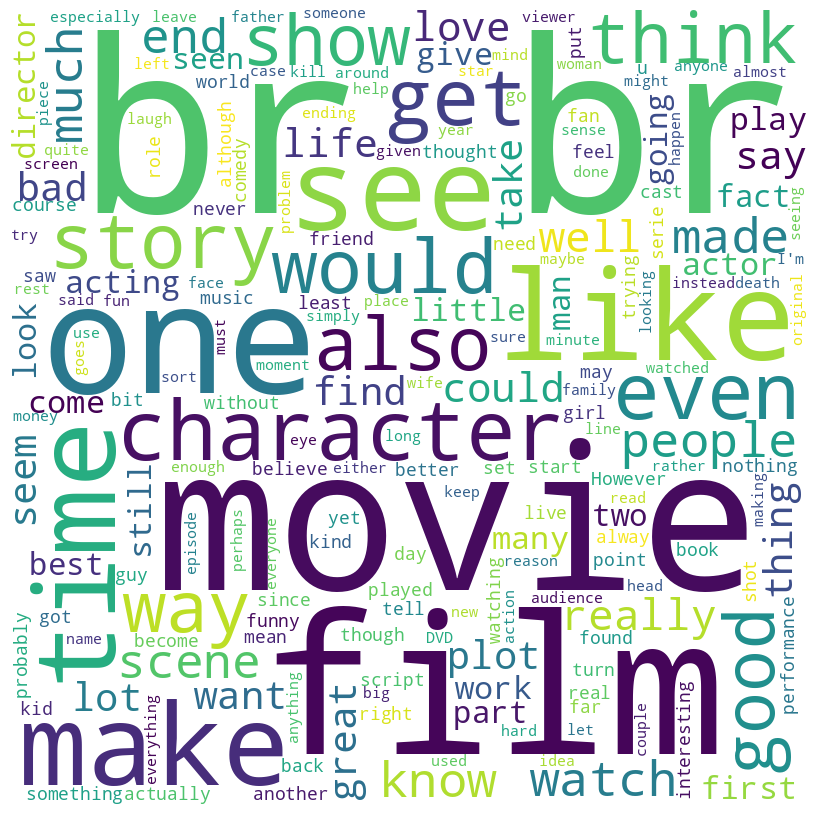

In [ ]:

# General word cloud
stop_words = set(stopwords.words('english'))
text = " ".join(review for review in movies['review'])

wordcloud = WordCloud(stopwords=stop_words,  width = 800, height = 800,
                background_color ='white', 
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('reviews_ wordcloud.png')plt.show()

In [ ]:

# positive and negative sentiment dataframe

positive = movies[movies['sentiment'] == 'positive']
negative = movies[movies['sentiment'] == 'negative']

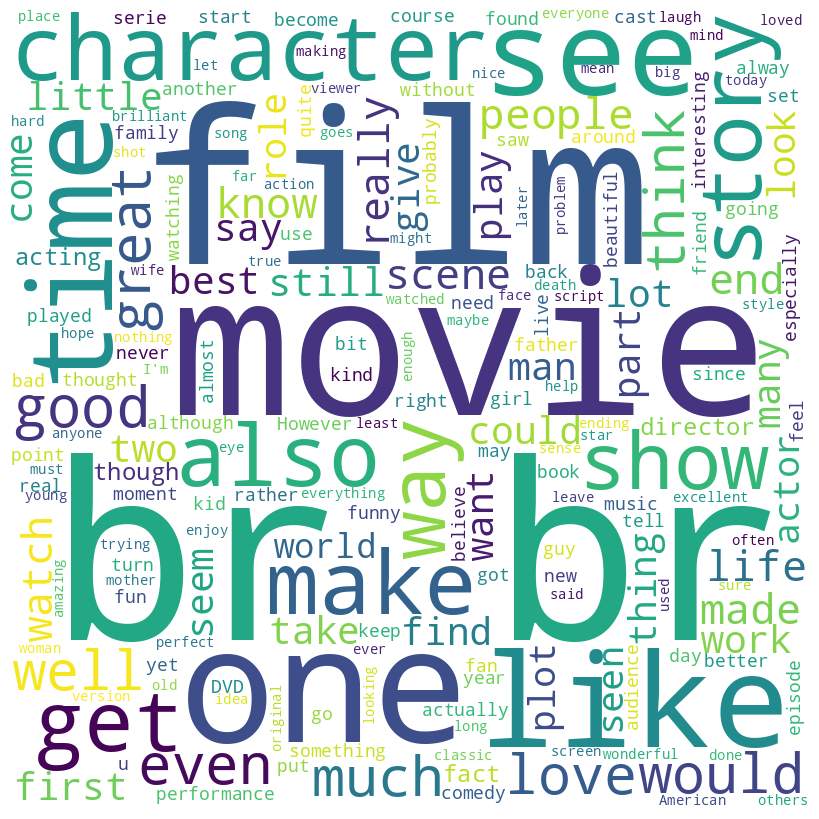

In [ ]:
stop_words = set(stopwords.words('english'))
text = " ".join(review for review in positive['review'])

wordcloud = WordCloud(stopwords=stop_words,  width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('positive_reviews_wordcloud.png')
plt.show()

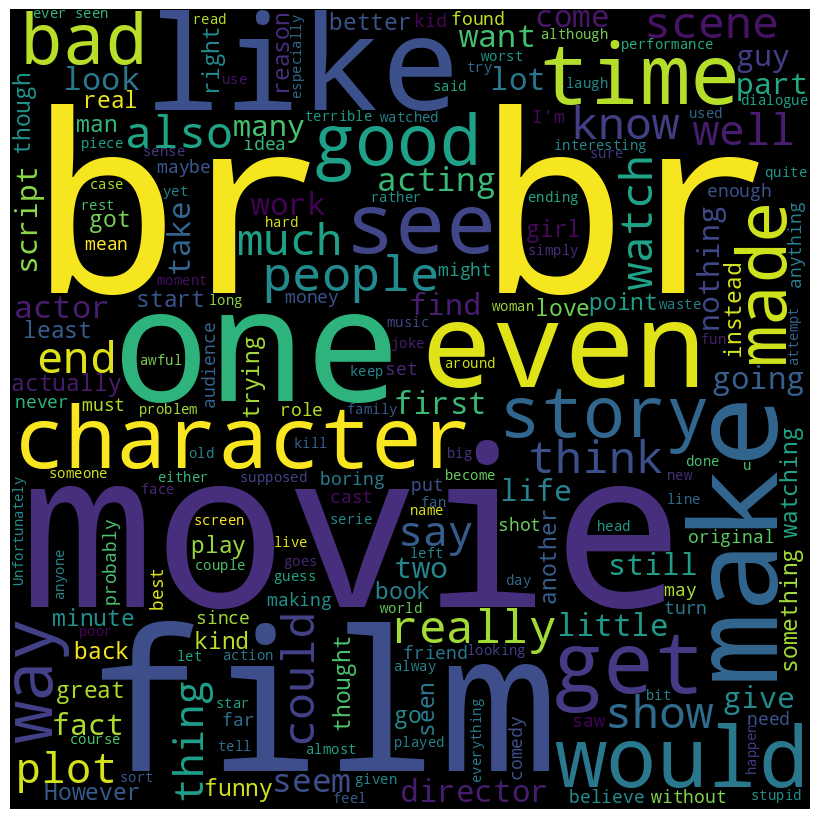

In [ ]:
stop_words = set(stopwords.words('english'))
text = " ".join(review for review in negative['review'])

wordcloud = WordCloud(stopwords=stop_words,  width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('negative_reviews_wordcloud.png')
plt.show()

In [18]:
pd.Series(movies['cleaned_review'])

0        [one, reviewers, mentioned, watching, oz, epis...
1        [wonderful, little, production, br, br, the, f...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, there, family, little, boy, jake, ...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [thought, movie, right, good, job, it, wasn, c...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [going, disagree, previous, comment, maltin, o...
49999    [no, expects, star, trek, movies, high, art, f...
Name: cleaned_review, Length: 50000, dtype: object

In [19]:
movies.head()

,review,sentiment,cleaned_review,Len_word,cleaned_Len_word
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, oz, epis...",1761,175
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, br, br, the, f...",998,91
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...",926,83
3,Basically there's a family where a little boy ...,negative,"[basically, there, family, little, boy, jake, ...",748,73
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visually, ...",1317,123


In [20]:
tex = " ".join(review for review in movies['cleaned_review'] if isinstance(review, str))

In [21]:
movies['cleaned_review'][0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'you',
 'll',
 'hooked',
 'they',
 'right',
 'exactly',
 'happened',
 'me',
 'br',
 'br',
 'the',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'me',
 'faint',
 'hearted',
 'timid',
 'this',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'its',
 'hardcore',
 'classic',
 'use',
 'word',
 'br',
 'br',
 'it',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'it',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'more',
 'so',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'far',
 'away',
 'br',
 'b

### Split the dataset

In [22]:
# target and predictors variables 
X = movies['cleaned_review'] 
y = movies['sentiment']

In [23]:
 # train test split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.19, random_state = 504, stratify = y)

In [24]:
#  shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40500,), (9500,), (40500,), (9500,))

**BUILD A WORD2VEC MODEL**

In [25]:
# import word2vec 
from gensim.models import Word2Vec

In [26]:
# build
w2v_model = Word2Vec(X_train, window = 10, min_count = 10, epochs = 25) 
w2v_model

In [ ]:
len(w2v_model.wv.key_to_index)

25159

In [27]:
w2v_model.wv.most_similar('character')

[('characters', 0.7081199884414673),
 ('protagonist', 0.6130867600440979),
 ('role', 0.571657121181488),
 ('personality', 0.5303782820701599),
 ('villain', 0.5055548548698425),
 ('everyman', 0.46899834275245667),
 ('preoccupation', 0.4370281398296356),
 ('jerk', 0.4262521266937256),
 ('roles', 0.4251675307750702),
 ('relationship', 0.42501384019851685)]

In [28]:
w2v_model.wv.most_similar('nice')

[('good', 0.7151674032211304),
 ('neat', 0.6436822414398193),
 ('cool', 0.6045448184013367),
 ('great', 0.5787517428398132),
 ('interesting', 0.5399765968322754),
 ('liked', 0.5374435186386108),
 ('pretty', 0.530182421207428),
 ('ok', 0.5082096457481384),
 ('okay', 0.49571993947029114),
 ('fine', 0.4861936569213867)]

In [29]:
w2v_model.wv.most_similar('horror')

[('slasher', 0.7376325130462646),
 ('slashers', 0.6844639778137207),
 ('splatter', 0.6381447315216064),
 ('gore', 0.6254945397377014),
 ('scary', 0.6228230595588684),
 ('gory', 0.5978645086288452),
 ('scares', 0.5911409258842468),
 ('genre', 0.5852854251861572),
 ('zombie', 0.551491916179657),
 ('thrills', 0.5479669570922852)]

In [30]:
w2v_model.wv.most_similar('drama')

[('thriller', 0.6103352308273315),
 ('dramas', 0.5696878433227539),
 ('dramatic', 0.5423365235328674),
 ('engrossing', 0.5378401279449463),
 ('comedy', 0.5322785973548889),
 ('romance', 0.5292230248451233),
 ('melodrama', 0.5236546993255615),
 ('suspense', 0.5029290914535522),
 ('balance', 0.49804753065109253),
 ('intrigue', 0.483494371175766)]

In [ ]:
w2v_model.wv.key_to_index

{'br': 0,
 'the': 1,
 'movie': 2,
 'it': 3,
 'film': 4,
 'like': 5,
 'this': 6,
 'good': 7,
 'time': 8,
 'story': 9,
 'and': 10,
 'there': 11,
 'bad': 12,
 'you': 13,
 'people': 14,
 'great': 15,
 'don': 16,
 'but': 17,
 'that': 18,
 'in': 19,
 'he': 20,
 'way': 21,
 'movies': 22,
 'characters': 23,
 'think': 24,
 'character': 25,
 'watch': 26,
 'films': 27,
 'seen': 28,
 'love': 29,
 'plot': 30,
 'life': 31,
 'acting': 32,
 'know': 33,
 'best': 34,
 'little': 35,
 'one': 36,
 'if': 37,
 'man': 38,
 'all': 39,
 'better': 40,
 'end': 41,
 'scene': 42,
 'scenes': 43,
 'well': 44,
 've': 45,
 'they': 46,
 'real': 47,
 'thing': 48,
 'watching': 49,
 'actors': 50,
 'what': 51,
 'funny': 52,
 'years': 53,
 'doesn': 54,
 'didn': 55,
 'director': 56,
 're': 57,
 'old': 58,
 'as': 59,
 'not': 60,
 'work': 61,
 'so': 62,
 'actually': 63,
 'makes': 64,
 'look': 65,
 'can': 66,
 'going': 67,
 'she': 68,
 'is': 69,
 'new': 70,
 'lot': 71,
 'cast': 72,
 'world': 73,
 'things': 74,
 'want': 75,
 'pre

In [ ]:
w2v_model.wv.most_similar('recommended')

[('recommend', 0.805004894733429),
 ('recomend', 0.638931155204773),
 ('recommendable', 0.6154775023460388),
 ('enjoyable', 0.5359026193618774),
 ('recommending', 0.5338688492774963),
 ('suggest', 0.5329174399375916),
 ('advise', 0.5197383165359497),
 ('regarded', 0.5017082095146179),
 ('rated', 0.47331470251083374),
 ('rewarding', 0.4696904122829437)]

In [31]:
w2v_model.wv.most_similar('memorable')

[('standout', 0.5689148902893066),
 ('marvelous', 0.5587276816368103),
 ('impressive', 0.5318660140037537),
 ('unforgettable', 0.5280089974403381),
 ('strongest', 0.5236220955848694),
 ('noteworthy', 0.5234497785568237),
 ('brilliant', 0.5171282291412354),
 ('amusing', 0.5157964825630188),
 ('terrific', 0.5152673125267029),
 ('enjoyable', 0.5124885439872742)]

In [32]:
# word to index 
word2idx = w2v_model.wv.key_to_index

In [33]:
w2v_model.vector_size

100

In [34]:

import numpy as np
embedding_matr = np.zeros((len(word2idx), w2v_model.vector_size))

### Create embedding matrix

In [35]:
# import numpy
import numpy as np 

# create a matrix of shape "len(word2idx" and "model.vector_size" 
# and fill with zeros 
embedding_matrix = np.zeros((len(word2idx), w2v_model.vector_size))
for word, i in word2idx.items():
    # get the embedding vector of each word 
    embedding_vector = w2v_model.wv[word]
    if embedding_vector is not None: 
        # fill the matrix up with the vectors
        embedding_matrix[i] = embedding_vector

In [36]:
embedding_matrix.shape

(25159, 100)

### Tokenize the sentences

In [37]:

# import necessary libary
from keras.preprocessing.text import Tokenizer 
from keras.utils import pad_sequences

In [38]:
#instantiate 
tokenizer = Tokenizer() 

# fit on the train texts
tokenizer.fit_on_texts(X_train)

In [39]:
# convert text to numerical sequences
X_train_seq = tokenizer.texts_to_sequences(X_train) 

# pad sequences to a fixed length 
X_train_pad = pad_sequences(X_train_seq, maxlen = 500)

In [40]:
# convert text to numerical sequences 
X_test_seq = tokenizer.texts_to_sequences(X_test) 

# pad sequences to a fixed length 
X_test_pad = pad_sequences(X_test_seq, maxlen = 500)

In [41]:
# mappings
mappings = {'positive':1, 'negative':0}

In [43]:
y_train_map = y_train.map(mappings) 
y_test_map = y_test.map(mappings)

In [44]:
y_test.value_counts()

negative    4750
positive    4750
Name: sentiment, dtype: int64

In [ ]:
y_tr_f = np.asarray(y_train_map).astype("float64") 
y_ts_f = np.asarray(y_test_map).astype("float64")

In [ ]:
y_tr_f

array([1., 1., 0., ..., 0., 0., 0.])

In [ ]:
y_ts_f

array([0., 1., 1., ..., 0., 1., 0.])

In [ ]:
voocab_size = len(tokenizer.word_index) + 1
voocab_size

91337

### Modelling

In [45]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense

In [46]:
model = Sequential()

model.add(Embedding(len(word2idx), w2v_model.vector_size, weights = [embedding_matrix], input_length =500, trainable = False))
model.add(GRU(192,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation = 'softmax'))
model.summary() 

# compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
          optimizer = tf.keras.optimizers.legacy.Adam(), metrics = ['accuracy']) 

# fit the model 
num_epochs = 10
history = model.fit(X_train_pad, y_train_map, batch_size = 372,
                    epochs=num_epochs, validation_data = (X_test_pad, y_test_map), verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          2515900   
                                                                 
 gru (GRU)                   (None, 192)               169344    
                                                                 
 dense (Dense)               (None, 2)                 386       
                                                                 
Total params: 2,685,630
Trainable params: 169,730
Non-trainable params: 2,515,900
_________________________________________________________________
Epoch 1/10
  3/109 [..............................] - ETA: 2:45 - loss: 0.7510 - accuracy: 0.5063

KeyboardInterrupt: ignored

In [ ]:
model = Sequential() 

model.add(Embedding(len(word2idx), w2v_model.vector_size, weights = [embedding_matrix], input_length =500, trainable = False))
model.add(GRU(192,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 100)          2515900   
                                                                 
 gru_7 (GRU)                 (None, 192)               169344    
                                                                 
 dense_7 (Dense)             (None, 2)                 386       
                                                                 
Total params: 2,685,630
Trainable params: 169,730
Non-trainable params: 2,515,900
_________________________________________________________________


In [ ]:
# compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
          optimizer = tf.keras.optimizers.legacy.Adam(), metrics = ['accuracy'])

In [ ]:
# fit the model 
num_epochs = 10
history = model.fit(X_train_pad, y_train_map, batch_size = 372,
                    epochs=num_epochs, validation_data = (X_test_pad, y_test_map), verbose=1)

Epoch 1/10
109/109 [==============================] - 207s 2s/step - loss: 0.6541 - accuracy: 0.6045 - val_loss: 0.5672 - val_accuracy: 0.7431
Epoch 2/10
109/109 [==============================] - 204s 2s/step - loss: 0.5067 - accuracy: 0.7519 - val_loss: 0.4847 - val_accuracy: 0.7974
Epoch 3/10
109/109 [==============================] - 204s 2s/step - loss: 0.4711 - accuracy: 0.7845 - val_loss: 0.4612 - val_accuracy: 0.8112
Epoch 4/10
109/109 [==============================] - 206s 2s/step - loss: 0.4107 - accuracy: 0.8188 - val_loss: 0.4461 - val_accuracy: 0.8129
Epoch 5/10
109/109 [==============================] - 204s 2s/step - loss: 0.3791 - accuracy: 0.8360 - val_loss: 0.4945 - val_accuracy: 0.8142
Epoch 6/10
109/109 [==============================] - 205s 2s/step - loss: 0.3513 - accuracy: 0.8499 - val_loss: 0.4226 - val_accuracy: 0.8335
Epoch 7/10
109/109 [==============================] - 202s 2s/step - loss: 0.3259 - accuracy: 0.8628 - val_loss: 0.4431 - val_accuracy: 0.8365

In [ ]:
# model evaluation 
model.evaluate(X_test_pad, y_test_map, batch_size = 524)

19/19 [==============================] - 3s 131ms/step - loss: 0.3771 - accuracy: 0.8579


[0.3770969808101654, 0.8578947186470032]

<Axes: >

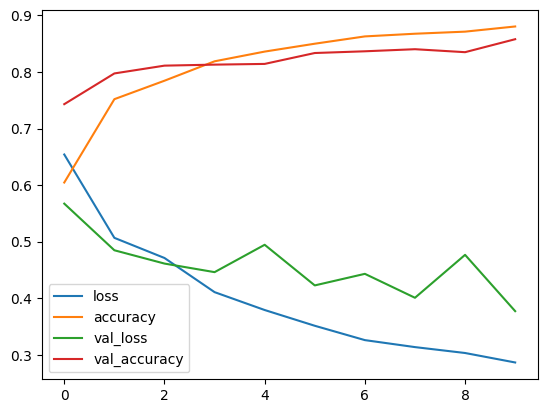

In [ ]:

# loss and accuracy curve
import pandas as pd 
pd.DataFrame(history.history).plot()

In [ ]:
# prediction probabilities 
pred_prob = model.predict(X_test_pad)
pred_prob[1]

297/297 [==============================] - 42s 140ms/step


array([0.01613026, 0.98386973], dtype=float32)

In [ ]:
pred_prob[1][1]

0.98386973

In [ ]:
# class predictions
pred = pred_prob.argmax(axis = 1)
pred[:20]

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
pd.Series(pred).value_counts()

1    5214
0    4286
dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report 

# confusion matrix
confusion_matrix(pred, y_test_map)

array([[3843,  443],
       [ 907, 4307]])

Text(70.72222222222221, 0.5, 'Truth')

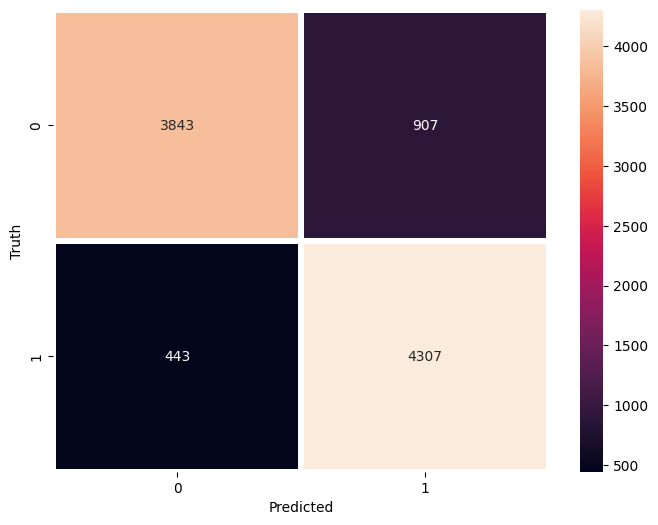

In [ ]:

# heatmap 
import seaborn as sns
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test_map, pred), annot = True,
            fmt = 'd', linewidth = 3)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# classification report 
print(classification_report(y_test_map, pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      4750
           1       0.83      0.91      0.86      4750

    accuracy                           0.86      9500
   macro avg       0.86      0.86      0.86      9500
weighted avg       0.86      0.86      0.86      9500



* Determine the sentiment of a generated movie reviews

In [ ]:
reviews_gen = ["I had high hopes for John Wick 4. And given the release date was extended, I thought it was going to be a blockbuster, but I was wrong. I hope the producer will do better in the next release if there is going to be one.", "24 hours and Jack Bauer was oustanding. That's the only movie I can watch over and over again without getting bored"]

In [ ]:
# convert text to sequences 
seq = tokenizer.texts_to_sequences(reviews_gen) 
pad_seq = pad_sequences(seq, maxlen = 1000) 

# predict 
proba = model.predict(pad_seq) 
Predict_labels = [] 
for i in range(len(proba)):
    if proba[i][0] > 0.5: 
        Predict_labels.append(1) 
    else: 
        Predict_labels.append(0)

1/1 [==============================] - 0s 298ms/step


In [ ]:
proba

array([[0.36863673, 0.6313633 ],
       [0.8612744 , 0.1387256 ]], dtype=float32)

In [ ]:
for i in range(len(reviews_gen)):
    print(reviews_gen[i])
    if Predict_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

I had high hopes for John Wick 4. And given the release date was extended, I thought it was going to be a blockbuster, but I was wrong. I hope the producer will do better in the next release if there is going to be one.
Predicted sentiment :  Negative
24 hours and Jack Bauer was oustanding. That's the only movie I can watch over and over again without getting bored
Predicted sentiment :  Positive


In [ ]:
model.save('Movie_reviews.h5')